# Análise Exploratória

## 1. Importação das Bibliotecas e Arquivos

In [26]:
# Importação das bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configurando o estilo dos gráficos
plt.style.use('ggplot')
sns.set(font_scale=1.2)

trips_amount_df = pd.read_csv('datasets/moved_project_sql_result_01.csv')
drop_off_df = pd.read_csv('datasets/moved_project_sql_result_04.csv')


## 2. Estudos dos Dados

In [27]:
print('\nDados do primeiro arquivo:')
print(trips_amount_df.head())
print(trips_amount_df.tail())
print('\nDados do segundo arquivo:')
print(drop_off_df.head())
print(drop_off_df.tail())


Dados do primeiro arquivo:
                      company_name  trips_amount
0                        Flash Cab         19558
1        Taxi Affiliation Services         11422
2                 Medallion Leasin         10367
3                       Yellow Cab          9888
4  Taxi Affiliation Service Yellow          9299
                                 company_name  trips_amount
59               4053 - 40193 Adwar H. Nikola             7
60                    2733 - 74600 Benny Jona             7
61              5874 - 73628 Sergey Cab Corp.             5
62  2241 - 44667 - Felman Corp, Manuel Alonso             3
63                3556 - 36214 RC Andrews Cab             2

Dados do segundo arquivo:
  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
   dropoff_location_name  average_trips
89       Mount Gr

In [28]:
#checando os tipos de dados
print(trips_amount_df.dtypes)
print()
print(drop_off_df.dtypes)

company_name    object
trips_amount     int64
dtype: object

dropoff_location_name     object
average_trips            float64
dtype: object


In [29]:
print('\nInformações do primeiro arquivo:')
trips_amount_df.info()

print('\nInformações do segundo arquivo:')
drop_off_df.info()


Informações do primeiro arquivo:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB

Informações do segundo arquivo:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [30]:
print(f"Colunas do primeiro arquivo: {trips_amount_df.columns.tolist()}")
print()
print(f"Colunas do segundo arquivo: {drop_off_df.columns.tolist()}")

Colunas do primeiro arquivo: ['company_name', 'trips_amount']

Colunas do segundo arquivo: ['dropoff_location_name', 'average_trips']


In [31]:
print("\nEstatísticas do primeiro arquivo:")
print(trips_amount_df.describe())

print("\nEstatísticas do segundo arquivo:")
print(drop_off_df.describe())


Estatísticas do primeiro arquivo:
       trips_amount
count     64.000000
mean    2145.484375
std     3812.310186
min        2.000000
25%       20.750000
50%      178.500000
75%     2106.500000
max    19558.000000

Estatísticas do segundo arquivo:
       average_trips
count      94.000000
mean      599.953728
std      1714.591098
min         1.800000
25%        14.266667
50%        52.016667
75%       298.858333
max     10727.466667


In [32]:
#checando ausentes do primeiro arquivo

dados_ausentes = trips_amount_df.isnull().sum()

porcentagem_ausentes = (dados_ausentes / len(trips_amount_df)) * 100

ausentes_df = pd.DataFrame({
'Dados Ausentes': dados_ausentes,
'Porcentagem': porcentagem_ausentes
})
print(ausentes_df)


              Dados Ausentes  Porcentagem
company_name               0          0.0
trips_amount               0          0.0


In [33]:
#checando ausentes do segundo arquivo
dados_ausentes = drop_off_df.isnull().sum()

porcentagem_ausentes = (dados_ausentes / len(trips_amount_df)) * 100

ausentes_df = pd.DataFrame({
'Dados Ausentes': dados_ausentes,
'Porcentagem': porcentagem_ausentes
})
print(ausentes_df)

                       Dados Ausentes  Porcentagem
dropoff_location_name               0          0.0
average_trips                       0          0.0


## 3. Identificação dos 10 Principais Bairros de Destino

Os 10 principais bairros de destino:
  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
5             Lake View    2420.966667
6            Grant Park    2068.533333
7         Museum Campus    1510.000000
8            Gold Coast    1364.233333
9    Sheffield & DePaul    1259.766667


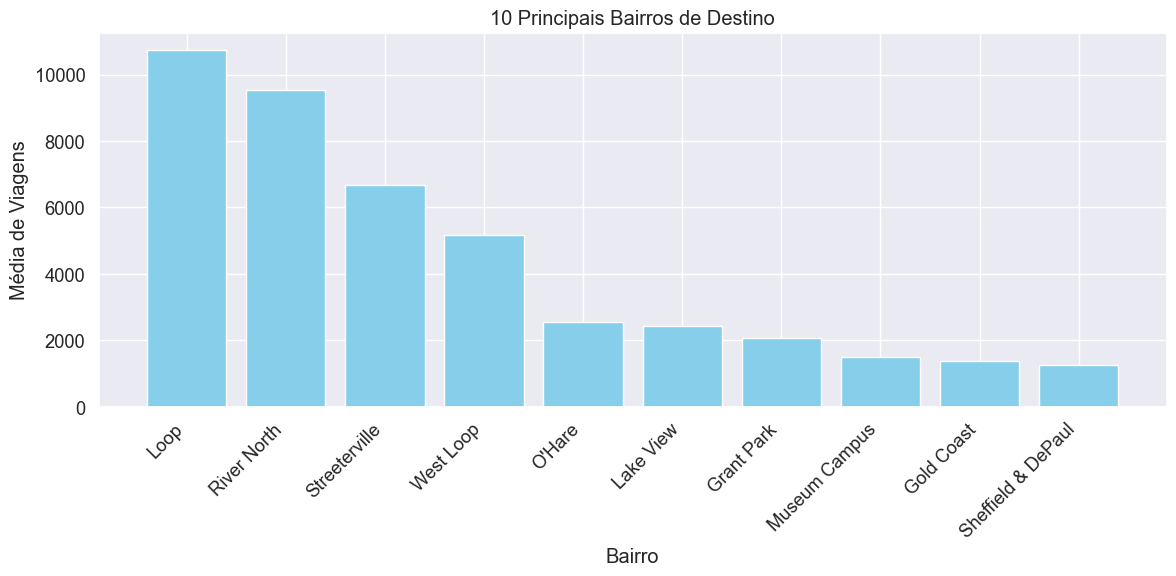

In [34]:
# Identificando os 10 principais bairros de destino
top_10_dropoff = drop_off_df.sort_values(by='average_trips', ascending=False).head(10)

# Exibindo os 10 principais bairros de destino
print("Os 10 principais bairros de destino:")
print(top_10_dropoff)

# Criando um gráfico de barras para visualizar os 10 principais bairros
plt.figure(figsize=(12, 6))
plt.bar(top_10_dropoff['dropoff_location_name'], top_10_dropoff['average_trips'], color='skyblue')
plt.title('10 Principais Bairros de Destino')
plt.xlabel('Bairro')
plt.ylabel('Média de Viagens')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## 4. 10 principais empresas de táxi por número de corridas

As 10 principais empresas de táxi por número de corridas:
                        company_name  trips_amount
0                          Flash Cab         19558
1          Taxi Affiliation Services         11422
2                   Medallion Leasin         10367
3                         Yellow Cab          9888
4    Taxi Affiliation Service Yellow          9299
5          Chicago Carriage Cab Corp          9181
6                       City Service          8448
7                           Sun Taxi          7701
8          Star North Management LLC          7455
9  Blue Ribbon Taxi Association Inc.          5953


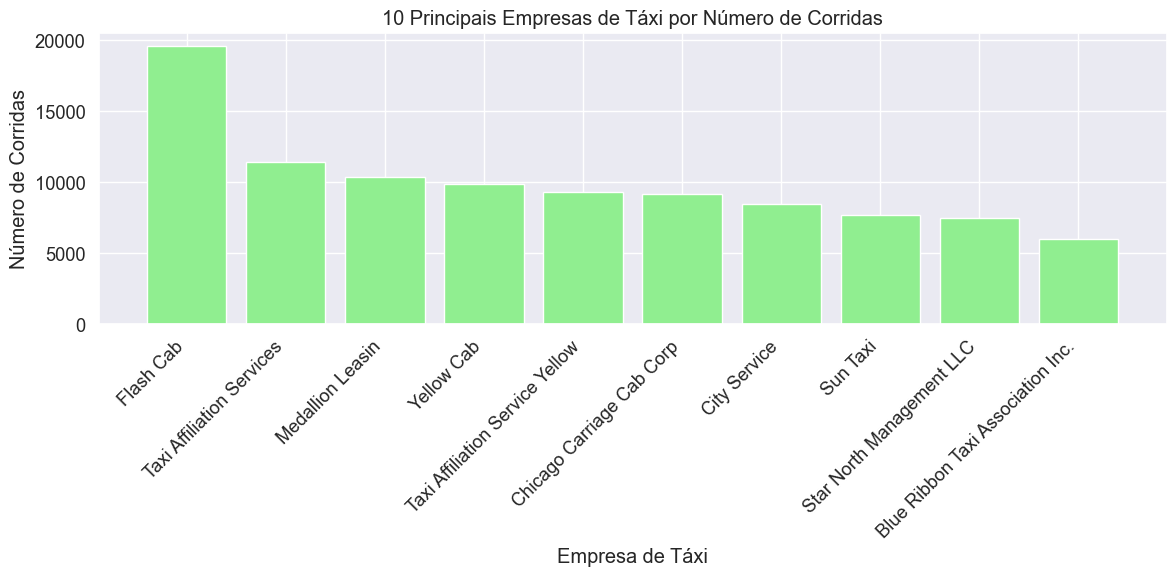

In [35]:
# Analisando o número de corridas por empresa de táxi
# Carregando os dados das empresas de táxi
taxi_companies_df = pd.read_csv('datasets/moved_project_sql_result_01.csv')

# Exibindo as 10 principais empresas de táxi por número de corridas
top_10_companies = taxi_companies_df.sort_values(by='trips_amount', ascending=False).head(10)
print("As 10 principais empresas de táxi por número de corridas:")
print(top_10_companies)

# Criando um gráfico de barras para visualizar as 10 principais empresas de táxi
plt.figure(figsize=(12, 6))
plt.bar(top_10_companies['company_name'], top_10_companies['trips_amount'], color='lightgreen')
plt.title('10 Principais Empresas de Táxi por Número de Corridas')
plt.xlabel('Empresa de Táxi')
plt.ylabel('Número de Corridas')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



 ## 5. 10 Principais Bairros por Número Médio de Corridas como Destino

C:\Users\isaqu\AppData\Local\Temp\ipykernel_34836\1360646832.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='average_trips', y='dropoff_location_name', data=top_10,


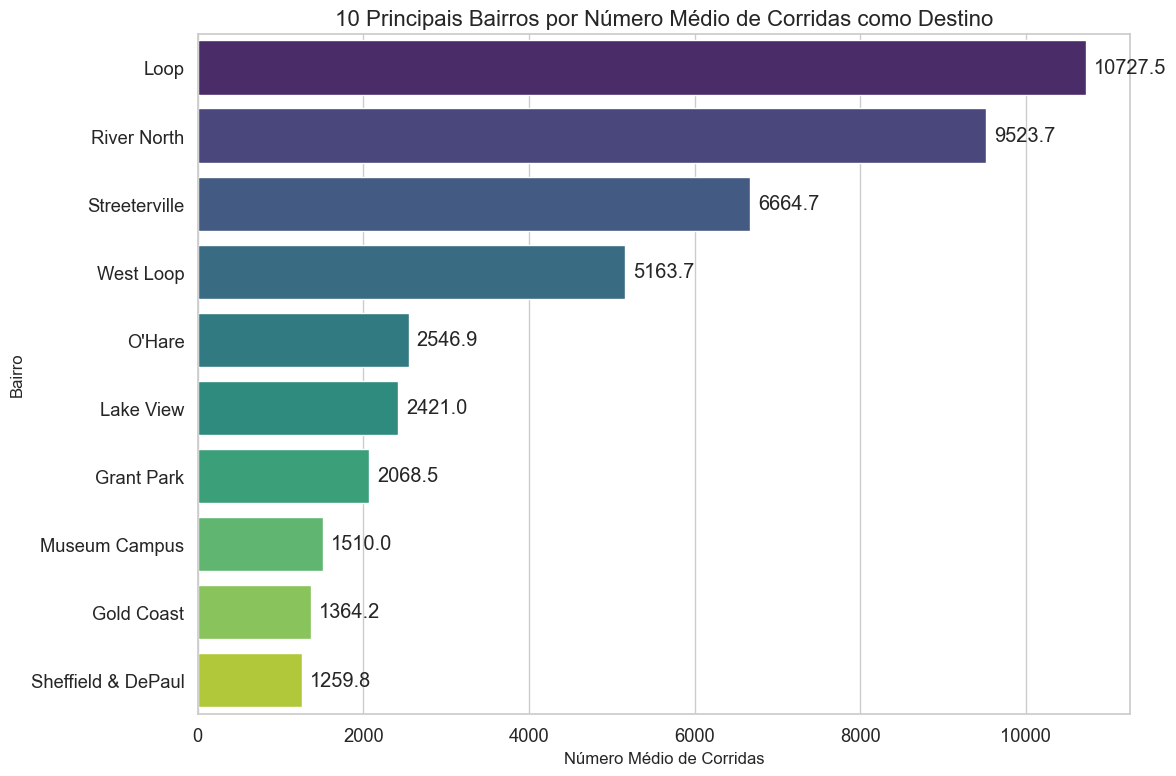

In [36]:
# Ordenar por número médio de corridas (em ordem decrescente)
df_sorted = drop_off_df.sort_values('average_trips', ascending=False)

# Selecionar os 10 principais bairros
top_10 = df_sorted.head(10)

# Configurar o estilo do gráfico
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")

# Criar o gráfico de barras
ax = sns.barplot(x='average_trips', y='dropoff_location_name', data=top_10, 
            palette='viridis')

# Adicionar rótulos e título
plt.title('10 Principais Bairros por Número Médio de Corridas como Destino', fontsize=16)
plt.xlabel('Número Médio de Corridas', fontsize=12)
plt.ylabel('Bairro', fontsize=12)

# Adicionar os valores nas barras
for i, v in enumerate(top_10['average_trips']):
    ax.text(v + 100, i, f'{v:.1f}', va='center')

# Ajustar layout
plt.tight_layout()

# Exibir o gráfico
plt.show()


 - Loop é o bairro com maior número médio de corridas como destino (10.727)
 - River North é o segundo destino mais popular (9.523 corridas)
 - Os dois primeiros bairros têm muito mais corridas que os demais
 - Streeterville (6.664) e West Loop (5.163) completam os quatro primeiros
 - Existe uma grande queda no número de corridas após os quatro primeiros bairros
 - Os principais destinos são áreas centrais e comerciais da cidade
 - A distribuição mostra que a demanda por táxis está concentrada em poucos bairros



# Testando Hipóteses

## 1. Estudo De Dados

In [37]:
loop_to_airport_df = pd.read_csv('datasets/moved_project_sql_result_07.csv')

In [38]:
print('\nDados do arquivo:')
print(loop_to_airport_df.head())
print(loop_to_airport_df.tail())


Dados do arquivo:
              start_ts weather_conditions  duration_seconds
0  2017-11-25 16:00:00               Good            2410.0
1  2017-11-25 14:00:00               Good            1920.0
2  2017-11-25 12:00:00               Good            1543.0
3  2017-11-04 10:00:00               Good            2512.0
4  2017-11-11 07:00:00               Good            1440.0
                 start_ts weather_conditions  duration_seconds
1063  2017-11-25 11:00:00               Good               0.0
1064  2017-11-11 10:00:00               Good            1318.0
1065  2017-11-11 13:00:00               Good            2100.0
1066  2017-11-11 08:00:00               Good            1380.0
1067  2017-11-04 16:00:00                Bad            2834.0


In [39]:
print(loop_to_airport_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB
None


In [40]:
print(loop_to_airport_df.dtypes)

start_ts               object
weather_conditions     object
duration_seconds      float64
dtype: object


In [41]:
# Converter a coluna start_ts para datetime
loop_to_airport_df['start_ts'] = pd.to_datetime(loop_to_airport_df['start_ts'])

# Verificar a conversão
print("\nTipo de dados após conversão:")
print(loop_to_airport_df.dtypes)


Tipo de dados após conversão:
start_ts              datetime64[ns]
weather_conditions            object
duration_seconds             float64
dtype: object


In [42]:
print(loop_to_airport_df.describe())

                            start_ts  duration_seconds
count                           1068       1068.000000
mean   2017-11-11 11:53:12.134831360       2071.731273
min              2017-11-04 00:00:00          0.000000
25%              2017-11-04 15:00:00       1438.250000
50%              2017-11-11 09:00:00       1980.000000
75%              2017-11-18 05:00:00       2580.000000
max              2017-11-25 23:00:00       7440.000000
std                              NaN        769.461125


## 2. hipótese & Teste

- hipótetese: "A duração média dos passeios do Loop para o Aeroporto Internacional O'Hare muda nos sábados chuvosos." 

Número de viagens aos sábados: 1068

Distribuição de sábados chuvosos e não chuvosos:
weather_conditions
Good    888
Bad     180
Name: count, dtype: int64

Número de viagens em sábados chuvosos: 180
Número de viagens em sábados não chuvosos: 888

Duração média das viagens em sábados chuvosos: 2427.21 segundos
Duração média das viagens em sábados não chuvosos: 1999.68 segundos

Nível de significância (alfa): 0.05

Resultados do teste t:
Estatística t: 7.1860
Valor p: 0.0000

Conclusão: Rejeitamos a hipótese nula.
Há evidência estatística de que a duração média das viagens do Loop para o Aeroporto O'Hare
é diferente em sábados chuvosos comparados a sábados não chuvosos.


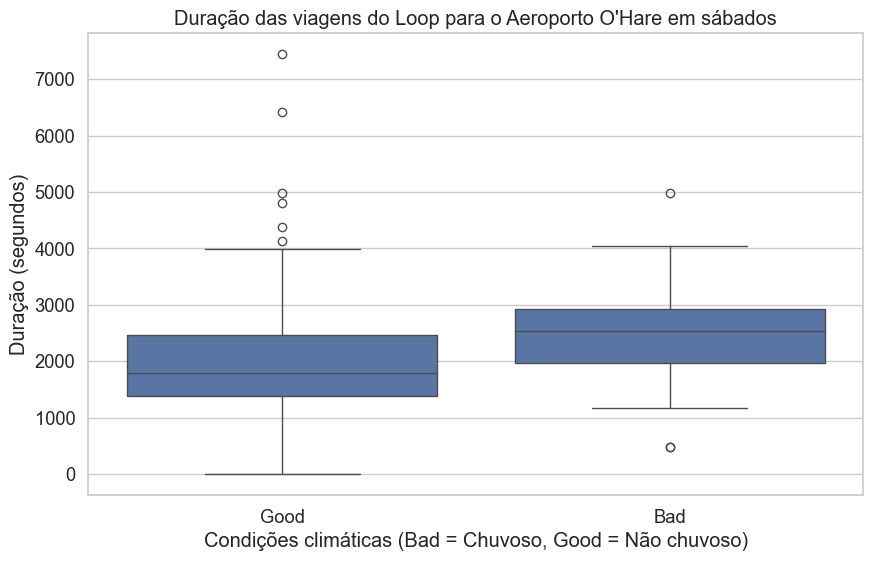

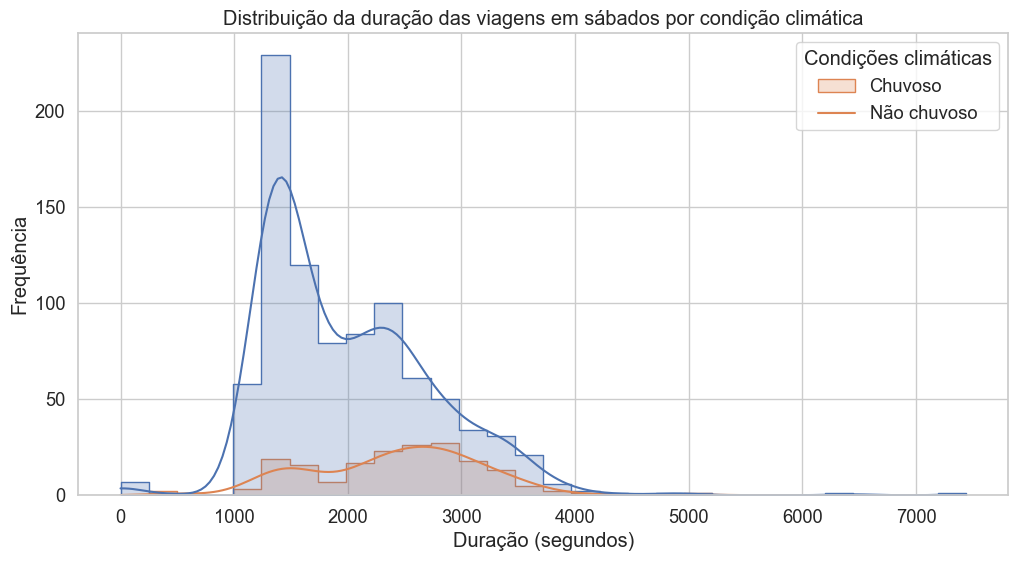

In [43]:
# Importar bibliotecas necessárias
from scipy import stats

# Extrair o dia da semana da coluna start_ts
loop_to_airport_df['day_of_week'] = loop_to_airport_df['start_ts'].dt.day_name()

# Filtrar apenas os sábados
saturdays_df = loop_to_airport_df[loop_to_airport_df['day_of_week'] == 'Saturday']

# Verificar a quantidade de dados para sábados
print(f"Número de viagens aos sábados: {len(saturdays_df)}")

# Verificar a distribuição de sábados chuvosos e não chuvosos
print("\nDistribuição de sábados chuvosos e não chuvosos:")
print(saturdays_df['weather_conditions'].value_counts())

# Agrupar os dados por condição climática (chuvoso ou não)
rainy_saturdays = saturdays_df[saturdays_df['weather_conditions'] == 'Bad']
non_rainy_saturdays = saturdays_df[saturdays_df['weather_conditions'] == 'Good']

print(f"\nNúmero de viagens em sábados chuvosos: {len(rainy_saturdays)}")
print(f"Número de viagens em sábados não chuvosos: {len(non_rainy_saturdays)}")

# Calcular a duração média das viagens para cada grupo
rainy_mean_duration = rainy_saturdays['duration_seconds'].mean()
non_rainy_mean_duration = non_rainy_saturdays['duration_seconds'].mean()

print(f"\nDuração média das viagens em sábados chuvosos: {rainy_mean_duration:.2f} segundos")
print(f"Duração média das viagens em sábados não chuvosos: {non_rainy_mean_duration:.2f} segundos")

# Definir o nível de significância
alpha = 0.05
print(f"\nNível de significância (alfa): {alpha}")

# Realizar o teste t para amostras independentes
t_stat, p_value = stats.ttest_ind(
    rainy_saturdays['duration_seconds'],
    non_rainy_saturdays['duration_seconds'],
    equal_var=False  # Não assumir variâncias iguais (teste de Welch)
)

print(f"\nResultados do teste t:")
print(f"Estatística t: {t_stat:.4f}")
print(f"Valor p: {p_value:.4f}")

# Interpretar os resultados
if p_value < alpha:
    print("\nConclusão: Rejeitamos a hipótese nula.")
    print("Há evidência estatística de que a duração média das viagens do Loop para o Aeroporto O'Hare")
    print("é diferente em sábados chuvosos comparados a sábados não chuvosos.")
else:
    print("\nConclusão: Não rejeitamos a hipótese nula.")
    print("Não há evidência estatística suficiente para afirmar que a duração média das viagens")
    print("do Loop para o Aeroporto O'Hare é diferente em sábados chuvosos.")

# Visualizar a comparação com um boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='weather_conditions', y='duration_seconds', data=saturdays_df)
plt.title('Duração das viagens do Loop para o Aeroporto O\'Hare em sábados')
plt.xlabel('Condições climáticas (Bad = Chuvoso, Good = Não chuvoso)')
plt.ylabel('Duração (segundos)')
plt.show()

# Visualizar as distribuições
plt.figure(figsize=(12, 6))
sns.histplot(data=saturdays_df, x='duration_seconds', hue='weather_conditions', 
             kde=True, bins=30, element='step')
plt.title('Distribuição da duração das viagens em sábados por condição climática')
plt.xlabel('Duração (segundos)')
plt.ylabel('Frequência')
plt.legend(title='Condições climáticas', labels=['Chuvoso', 'Não chuvoso'])
plt.show()

